In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [3]:
'''Inspiration
Some of the interesting questions (tasks) which can be performed on this dataset -

Understanding what content is available in different countries
Identifying similar content by matching text-based features
Network analysis of Actors / Directors and find interesting insights
Is Netflix has increasingly focusing on TV rather than movies in recent years.'''

'Inspiration\nSome of the interesting questions (tasks) which can be performed on this dataset -\n\nUnderstanding what content is available in different countries\nIdentifying similar content by matching text-based features\nNetwork analysis of Actors / Directors and find interesting insights\nIs Netflix has increasingly focusing on TV rather than movies in recent years.'

In [4]:
Netflix=pd.read_csv("C:/Users/bobby/OneDrive/Desktop/netflix_titles.csv") #read dataset.

In [5]:
df=Netflix.copy()  #Make copy of our dataset so we cant manipulate the orignal dataset.

In [6]:
df.head(2) # to see the dataset by head method.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...


In [7]:
df.info() #To get the information of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [8]:
df.describe() # Describe the data set so we can see the statistical information about the data set.

,show_id,release_year
count,6.234000e+03,6234.00000
mean,7.670368e+07,2013.35932
std,1.094296e+07,8.81162
min,2.477470e+05,1925.00000
25%,8.003580e+07,2013.00000
50%,8.016337e+07,2016.00000
75%,8.024489e+07,2018.00000
max,8.123573e+07,2020.00000


In [9]:
df.isnull().sum() # Check the Null values of the data set.

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [10]:
df.count() # count of each column of the dataset.

show_id         6234
type            6234
title           6234
director        4265
cast            5664
country         5758
date_added      6223
release_year    6234
rating          6224
duration        6234
listed_in       6234
description     6234
dtype: int64

In [11]:
df.shape #To check the total rows and columns of the dataset

(6234, 12)

In [12]:
df.nunique() # To check the unique values for each columns of the dataset.

show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64

In [13]:
df.dropna(inplace=True)  #Drop Null values to get great insight.

In [14]:
df.head(5) #Print first 5 values.

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden","September 8, 2017",2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


In [15]:
df["date_added"] # df["date_added"] has object datatype, we need to convert it into datetime datatype.

0       September 9, 2019
4       September 8, 2017
6       September 8, 2017
7       September 8, 2017
9       September 8, 2017
              ...        
6142      August 30, 2019
6158       August 2, 2019
6167      August 15, 2019
6182        April 9, 2019
6213       April 15, 2017
Name: date_added, Length: 3774, dtype: object

In [16]:
df["date_added"]=pd.to_datetime(df["date_added"])

# We Have to add these columns after the date_added column and then remove the date_added column.

d=df["date_added"].dt.day
y=df["date_added"].dt.year
m=df["date_added"].dt.month

In [17]:
df.insert(7,"Day",d)

In [18]:
df.insert(8,"Year",y)
df.insert(9,"Month",m)

In [19]:
df.drop(["Day","Year","Month"],axis=1,inplace=True)

In [20]:
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
6,70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada",2017-09-08,2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,2017-09-08,2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...
9,70304990,Movie,Good People,Henrik Ruben Genz,"James Franco, Kate Hudson, Tom Wilkinson, Omar...","United States, United Kingdom, Denmark, Sweden",2017-09-08,2014,R,90 min,"Action & Adventure, Thrillers",A struggling couple can't believe their luck w...


# Data Visualization 

### Type :- Movie and Tv Shows.

In [21]:
Netflix["type"].isnull().sum() #since we have no null value in type column so we can access direct from the orignal dataset.

0

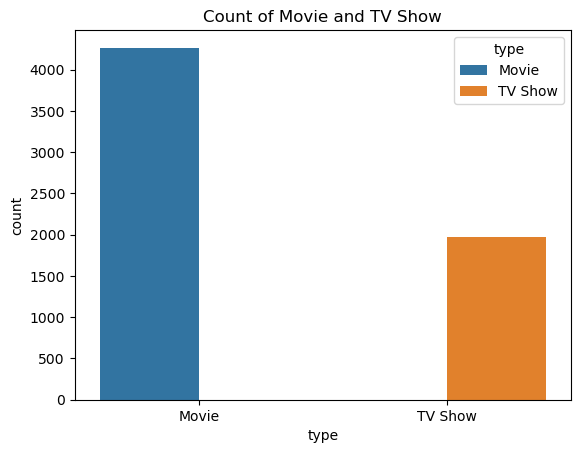

In [22]:
sns.countplot(data=Netflix,x="type",hue="type")
plt.title("Count of Movie and TV Show");
#since we can clearly see that Movie has got more rating then Tv Show.
#So the insight says no Netflix isnt focusing more on Tv  Show.

# Rating of Shows and Movies

In [23]:
Netflix["rating"].isnull().sum()

10

In [24]:
df["rating"].isnull().sum()

0

In [25]:
Netflix["rating"].count()

6224

In [26]:
df["rating"].count()

3774

In [27]:
#Since we have only 10 Null values in our orignal data set, so we can use the orignal data set column becoz it will give better insight.

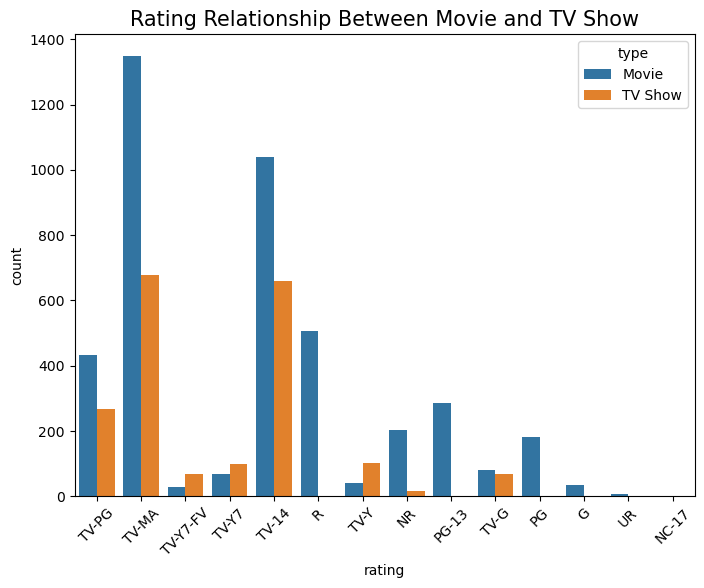

In [28]:
plt.subplots(figsize=(8,6))
sns.countplot(data=Netflix,x="rating",hue="type")
plt.xticks(rotation=45)
plt.title("Rating Relationship Between Movie and TV Show",fontsize=15);

# Pie chart for the Type:- Movie and TV Show

In [29]:
# First of all we need value count of Movie and Tv show.

In [30]:
size=Netflix["type"].value_counts()
size

Movie      4265
TV Show    1969
Name: type, dtype: int64

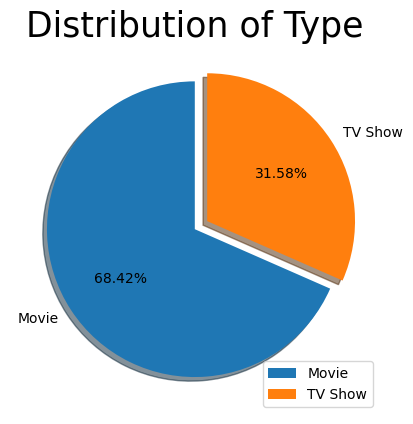

In [31]:
lab=["Movie","TV Show"]
plt.pie(size,labels=lab,explode=[0.0,0.1],autopct="%.2f%%",startangle=90,shadow=True)
plt.legend(loc="lower right")
plt.title("Distribution of Type",fontsize=25);

# Findout the Relationship between Rating and Type by pie chart.

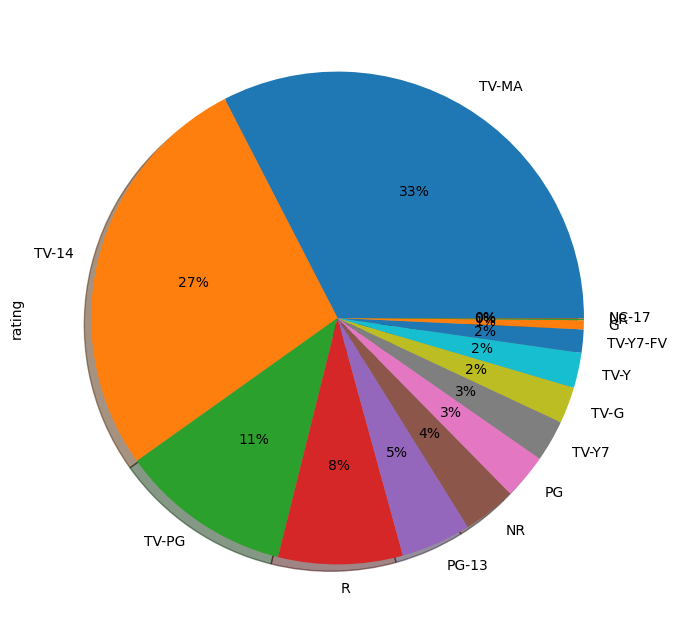

In [32]:
Netflix["rating"].value_counts().plot.pie(autopct="%1.f%%",shadow=True,figsize=(10,8));

# Find out the most occur country

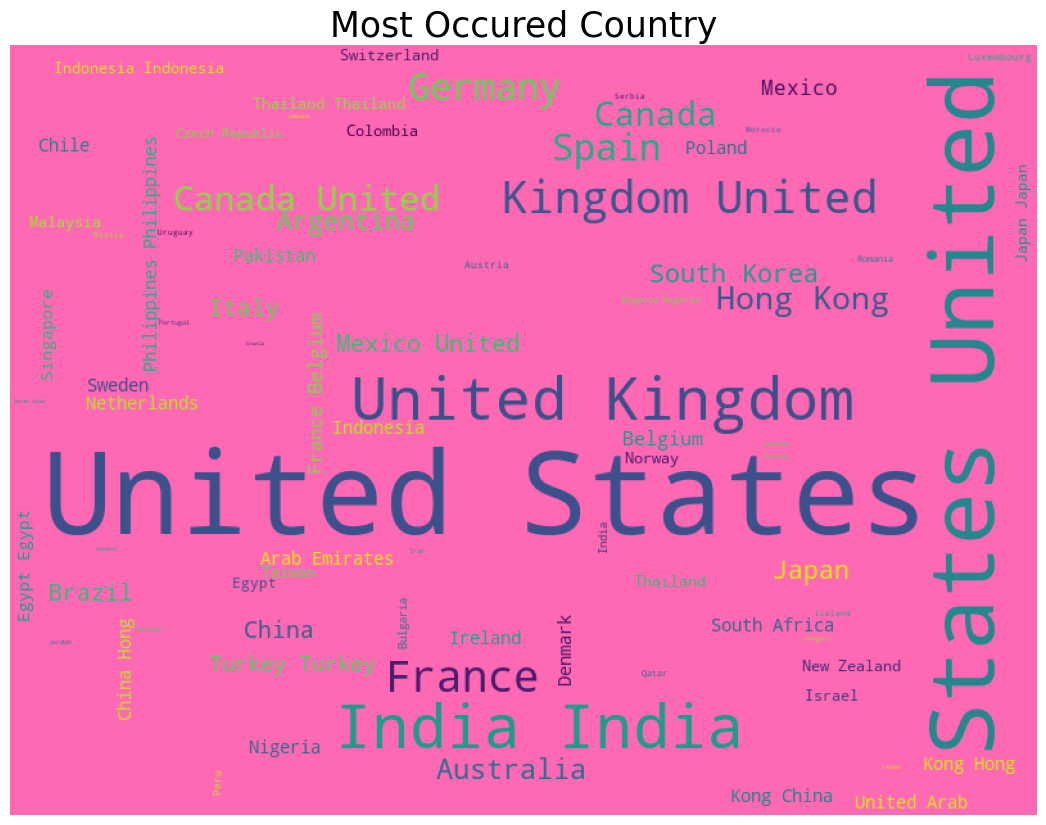

In [33]:
plt.subplots(figsize=(20,10))
wc=WordCloud(background_color="Hotpink",width=800,height=600).generate(" ".join(df["country"]))
plt.imshow(wc)
plt.axis("off")
#plt.savefig("country.png")
plt.title("Most Occured Country",fontsize=25);

# Find out the most occured Cast

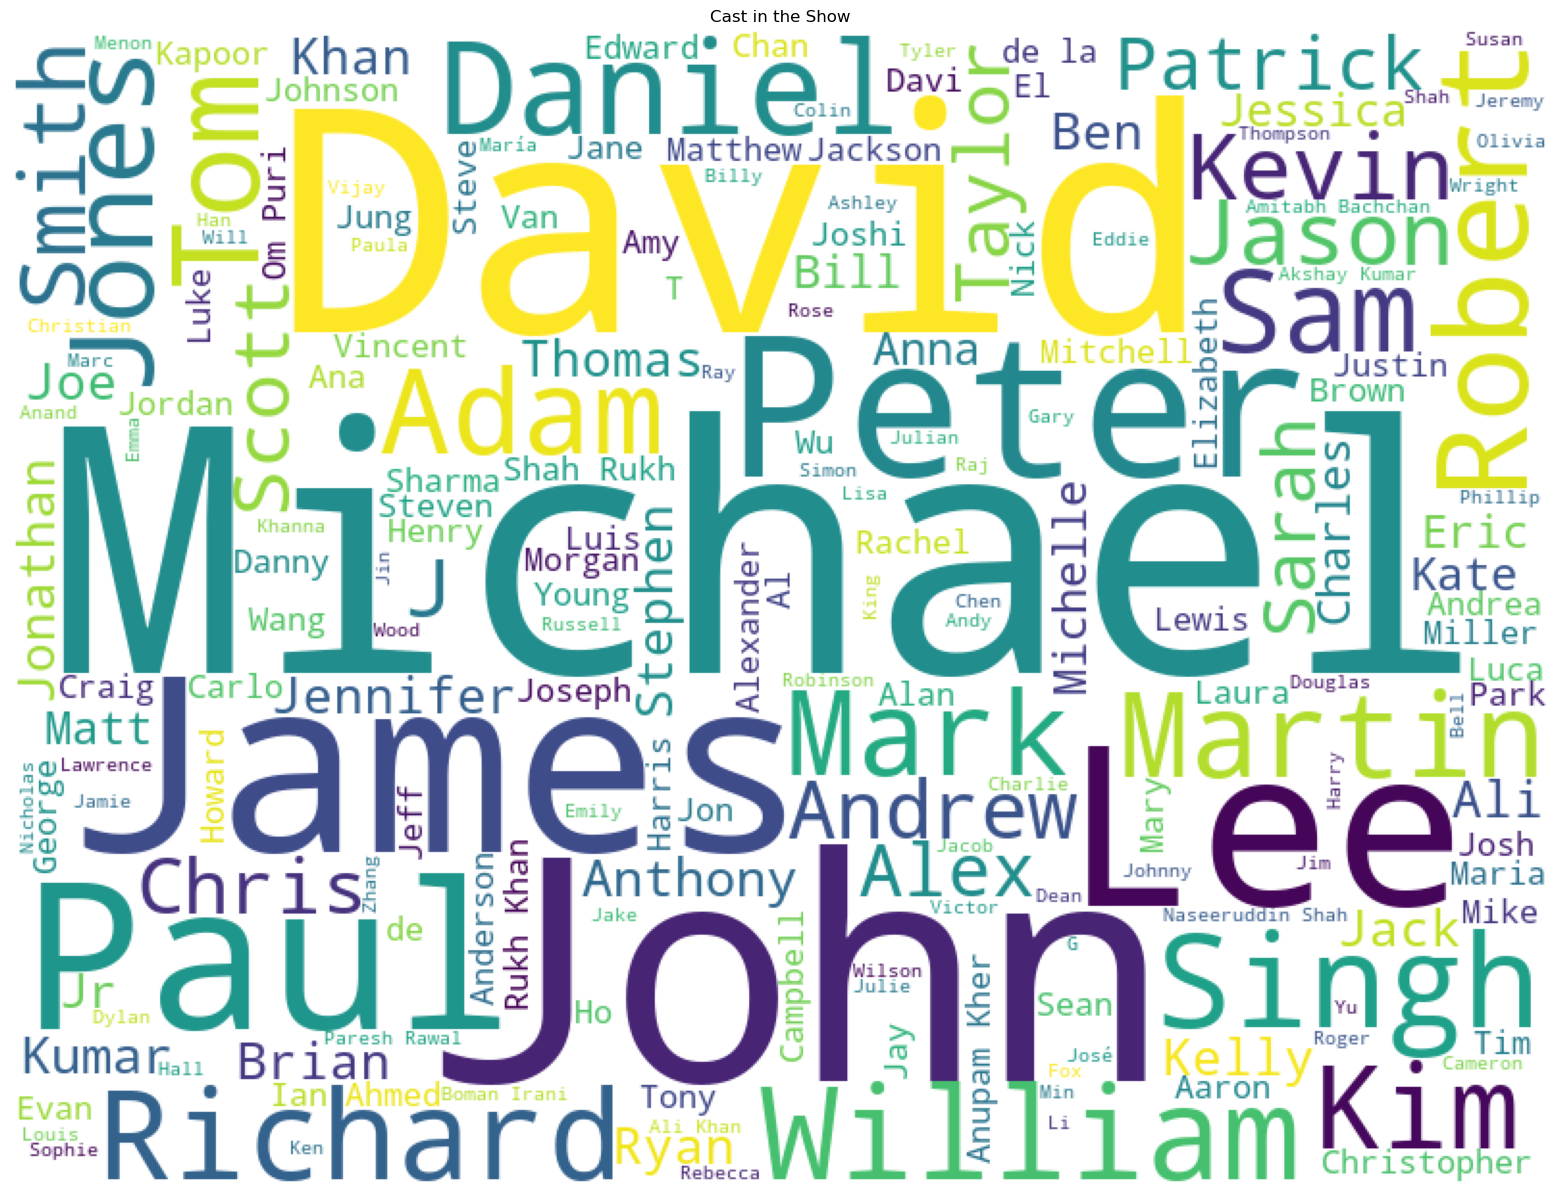

In [34]:
plt.subplots(figsize=(20,15))
wc=WordCloud(background_color="White",width=800,height=600).generate(" ".join(df["cast"]))
plt.imshow(wc)
plt.axis("off")
plt.savefig("C:/Users/bobby/OneDrive/Desktop/Most_Cast.png")
plt.title("Cast in the Show");

# Most Occured Category

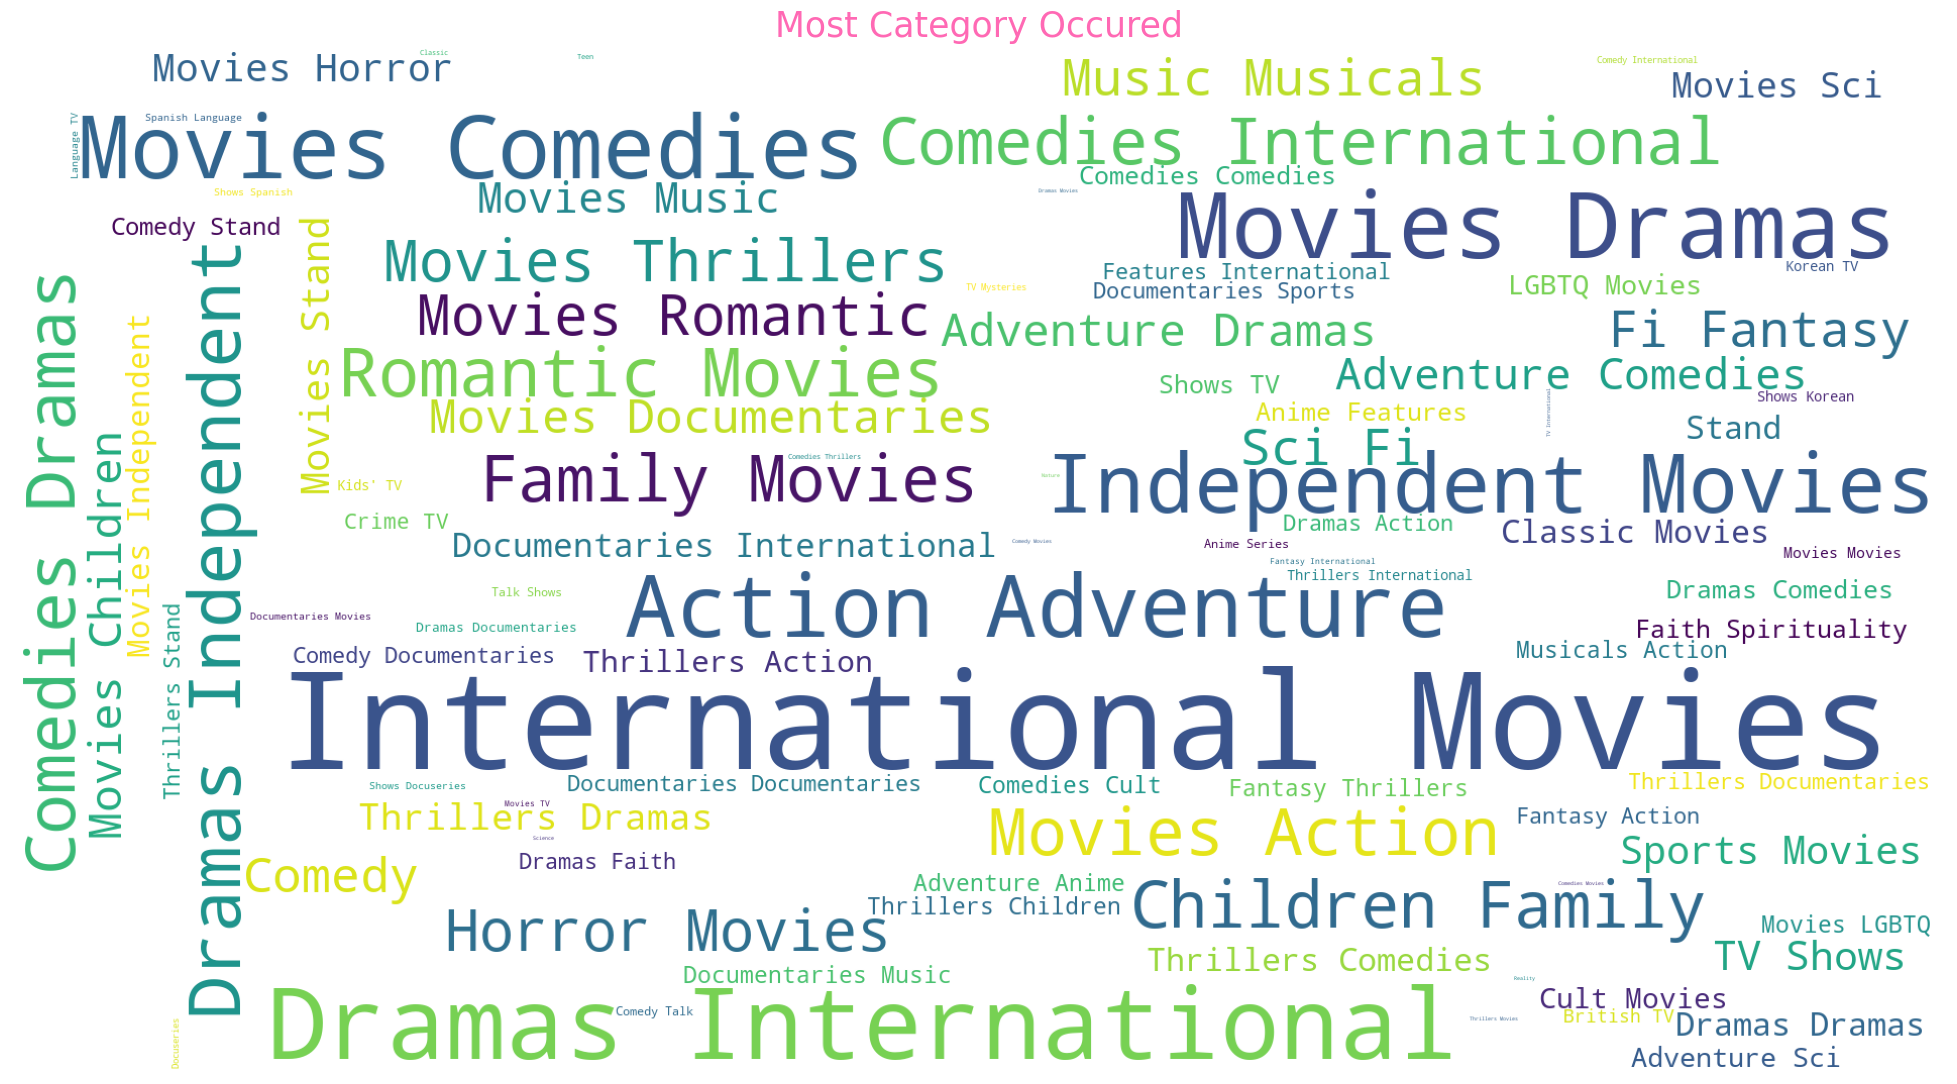

In [35]:
plt.subplots(figsize=(25,15))
wc=WordCloud(background_color="White",width=1920,height=1020).generate(" ".join(df["listed_in"]))
plt.imshow(wc)
plt.axis("off")
plt.savefig("C:/Users/bobby/OneDrive/Desktop/Most_Category.png")
plt.title("Most Category Occured",fontsize=25,color="Hotpink");

# Most Occured Directors.

Text(0.5, 1.0, 'Most Occured Directiors')

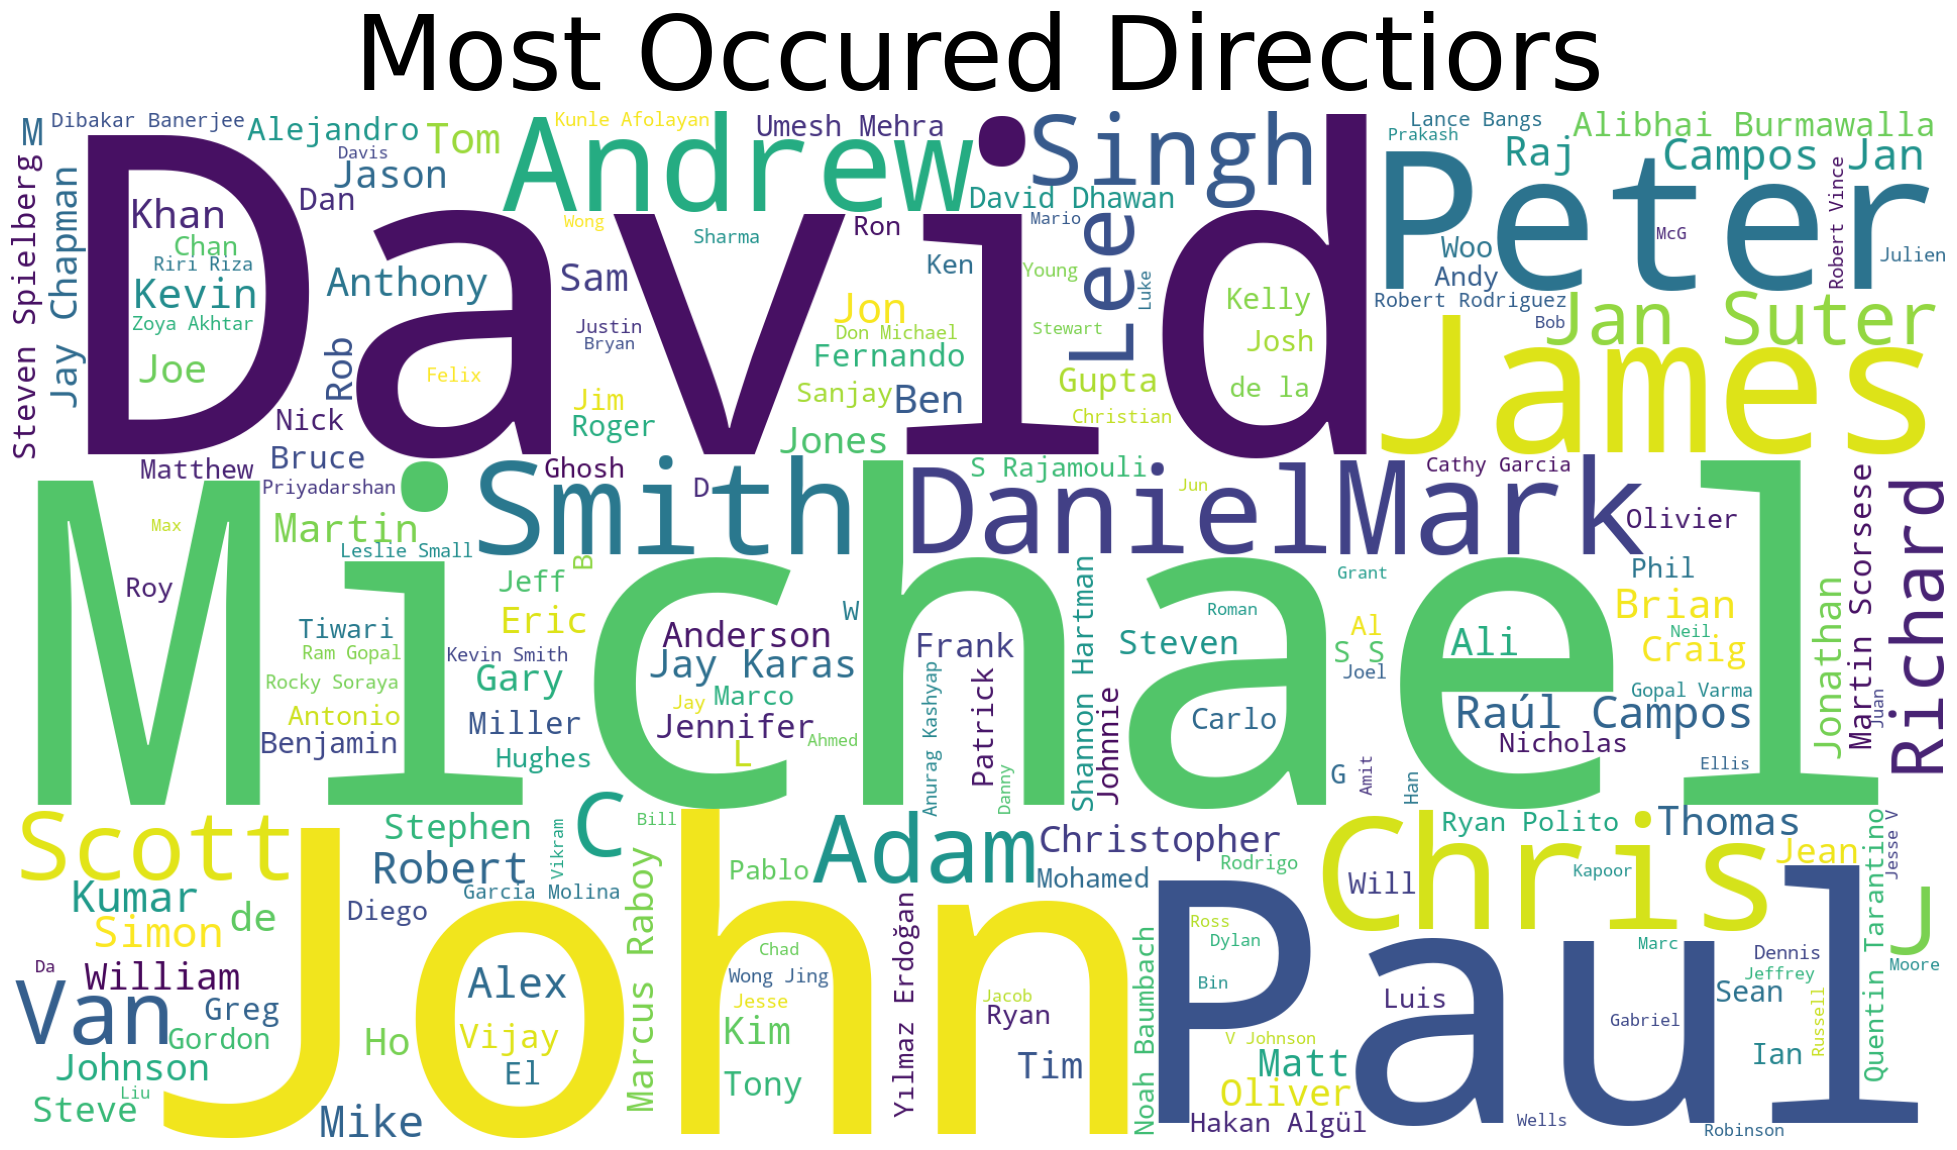

In [36]:
plt.subplots(figsize=(25,15))
wc=WordCloud(background_color="White",width=1920,height=1020).generate(" ".join(df["director"]))
plt.imshow(wc)
plt.axis("off")
plt.savefig("C:/Users/bobby/OneDrive/Desktop/Most_Directors.png")
plt.title("Most Occured Directiors",fontsize=75)